# Medical data visualiser

Visualised and made calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

In [5]:
import matplotlib.pyplot   as plt
import pandas as pd

In [6]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Add an 'overweight' column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [7]:
df['metres/m'] = df['height']/100
df['metres/m^2'] = df['metres/m']**2
df['BMI'] = df['weight']/df['metres/m^2']
df['over_weight'] = df['BMI'] > 25
df['over_weight'] = df['over_weight'].astype(int)
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,metres/m,metres/m^2,BMI,over_weight
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.68,2.8224,26.927438,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.58,2.4964,50.472681,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.83,3.3489,31.353579,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.63,2.6569,27.099251,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0,1.70,2.8900,24.913495,0


Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1

In [8]:
df['cholesterol']= df['cholesterol'] > 1
df['gluc']= df['gluc'] > 1
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,metres/m,metres/m^2,BMI,over_weight
69995,99993,19240,2,168,76.0,120,80,False,False,1,0,1,0,1.68,2.8224,26.927438,1
69996,99995,22601,1,158,126.0,140,90,True,True,0,0,1,1,1.58,2.4964,50.472681,1
69997,99996,19066,2,183,105.0,180,90,True,False,0,1,0,1,1.83,3.3489,31.353579,1
69998,99998,22431,1,163,72.0,135,80,False,True,0,0,0,1,1.63,2.6569,27.099251,1
69999,99999,20540,1,170,72.0,120,80,True,False,0,0,1,0,1.70,2.8900,24.913495,0


In [9]:
df['gluc'] = df['gluc'].astype(int)
df['cholesterol'] = df['cholesterol'].astype(int)
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,metres/m,metres/m^2,BMI,over_weight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1.68,2.8224,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.56,2.4336,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1.65,2.7225,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.69,2.8561,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1.56,2.4336,23.011177,0


Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot().

In [10]:
cardio1 = df[df['cardio']==1]
cardio0 = df[df['cardio']==0]

In [11]:
import seaborn as sns
df_cat=pd.melt(df, id_vars =['cardio'], value_vars =['cholesterol', 'gluc', 'smoke', 'alco', 'active','over_weight']) 
df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


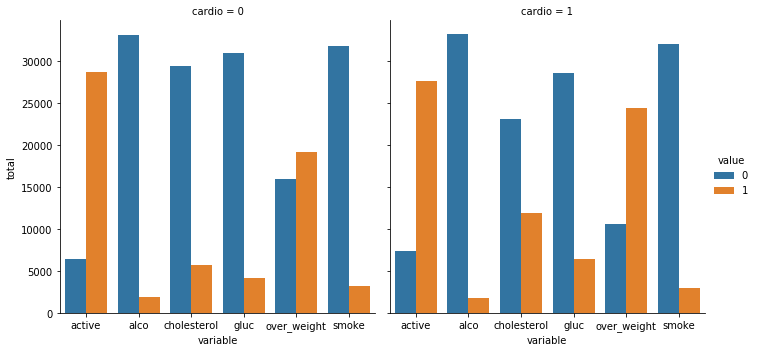

In [12]:
df_cat["total"] = 1
df_cat = df_cat.groupby(["cardio", "variable", "value"], as_index =False).count()
fig = sns.catplot(x = "variable", y = "total", data = df_cat, hue ="value", kind = "bar", col = "cardio").fig

Clean the data. Filter out the following patient segments that represent incorrect data:

In [13]:
 df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))]

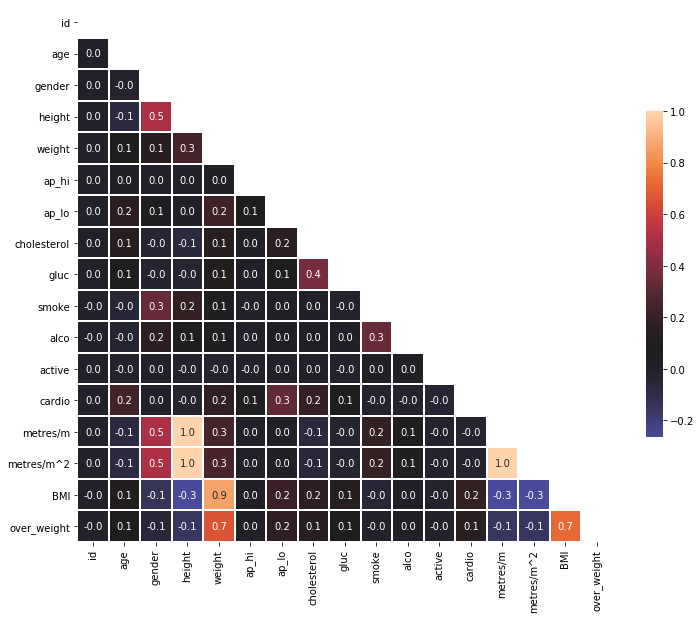

In [15]:
import numpy as np
corr = df_heat.corr(method = "pearson")
mask = np.triu(corr)
fig, ax = plt.subplots(figsize=(12, 12)) 
sns.heatmap(corr, linewidths=1, annot = True, square = True, mask = mask, fmt =".1f",center =0.08,cbar_kws = {"shrink":0.5})